Tasks: EDA(Exploratory Data Analysis):
1. Univariate Analysis.
2. BiVariate Analysis
3. Multivariate Analysis

In [220]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#### Acces to drive to get data

In [221]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
!pip install patool

In [223]:
import patoolib
# patoolib.extract_archive("/content/drive/MyDrive/companies.rar", outdir="/content")

#### Reading and explore data

In [224]:
data=pd.read_csv('/content/companies.csv')
data.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [226]:
data.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


## **preprocess for data**

* Checking the percentage of NaN(null values) values present in each feature
* Repace nan values with suitable value
* Removing duplicates
* Dropping columns which have NaN values.
* Remove unnecessary and corrupted data.
* Data Labelling.
* check outliars and Handle it .

### Romving unnecessary features:

In [227]:
data.iloc[:,28:]

,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


In [228]:
data.drop(axis=1,columns=['id','Unnamed: 0.1','name','permalink','domain','homepage_url','logo_url','logo_width' ,'logo_height' ,'normalized_name','twitter_username','tag_list','entity_type'],inplace=True)

### Checking the percentage of NaN(null values) values present in each feature

In [229]:
for col,null in enumerate(data.isnull().sum()):
  print(data.columns.values[col]," :",np.int(null/len(data)*100))

entity_id  : 0
parent_id  : 100
category_code  : 37
status  : 0
founded_at  : 53
closed_at  : 98
short_description  : 96
description  : 53
overview  : 35
country_code  : 55
state_code  : 74
city  : 57
region  : 0
first_investment_at  : 98
last_investment_at  : 98
investment_rounds  : 98
invested_companies  : 98
first_funding_at  : 83
last_funding_at  : 83
funding_rounds  : 83
funding_total_usd  : 85
first_milestone_at  : 53
last_milestone_at  : 53
milestones  : 53
relationships  : 34
created_by  : 20
created_at  : 0
updated_at  : 0
lat  : 57
lng  : 57
ROI  : 99


<ipython-input-229-36906a027d68>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data.columns.values[col]," :",np.int(null/len(data)*100))


### Dropping columns which have NaN values.

In [230]:
drop_list=[]
for col,null in enumerate(data.isnull().sum()):
    if (np.int(null/len(data)*100)) >80 :
       drop_list.append(data.columns.values[col])

<ipython-input-230-bf00a36fd6d4>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (np.int(null/len(data)*100)) >80 :


In [231]:
drop_list.remove('funding_total_usd')

In [232]:
data.drop(axis=1,columns=drop_list,inplace=True)

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   entity_id           196553 non-null  int64  
 1   category_code       123186 non-null  object 
 2   status              196553 non-null  object 
 3   founded_at          91227 non-null   object 
 4   description         92048 non-null   object 
 5   overview            126971 non-null  object 
 6   country_code        87990 non-null   object 
 7   state_code          50903 non-null   object 
 8   city                83890 non-null   object 
 9   region              196553 non-null  object 
 10  funding_total_usd   27874 non-null   float64
 11  first_milestone_at  91699 non-null   object 
 12  last_milestone_at   91699 non-null   object 
 13  milestones          91699 non-null   float64
 14  relationships       129667 non-null  float64
 15  created_by          155533 non-nul

In [234]:
data[data['last_milestone_at'].isnull()]

,entity_id,category_code,status,founded_at,description,overview,country_code,state_code,city,region,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng
1,10,games_video,acquired,NaN,NaN,Flektor is a rich-media mash-up platform that ...,USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467
3,10000,network_hosting,operating,2008-07-26,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN
4,10001,games_video,operating,2008-07-26,NaN,This company shows free movies online on their...,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN
5,10002,advertising,operating,2007-06-27,NaN,Synergie Media is a Dutch and Moroccan Web Des...,MAR,NaN,Agadir,Agadir,NaN,NaN,NaN,NaN,2.0,NaN,2008-08-24 17:39:10,2008-09-06 14:19:19,30.427755,-9.598107
6,10003,cleantech,operating,2008-08-20,NaN,Creating infrastructure to provide incentives ...,IND,NaN,Vadodara,Vadodara,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 19:49:25,2010-04-22 23:48:20,22.307159,73.181219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196539,9988,NaN,operating,NaN,NaN,[Orange Dogs](http://www.orangedogs.com) bring...,NLD,NaN,Amsterdam,Amsterdam,NaN,NaN,NaN,NaN,3.0,NaN,2008-08-24 09:56:24,2013-06-28 20:54:22,52.370216,4.895168
196542,9991,web,operating,2006-12-18,NaN,"Founded in 2007, Forexpros is a definitive sou...",CYP,NaN,Nicosia,Nicosia,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 15:20:22,2011-07-25 18:52:53,35.185566,33.382276
196545,99938,software,operating,2004-01-01,Software product company,Atandra is a Intuit Gold Certified software pr...,USA,NJ,Short Hills,Short Hills,NaN,NaN,NaN,NaN,NaN,NaN,2011-09-06 23:17:53,2012-06-29 13:18:41,40.748350,-74.323219
196546,99939,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,2011-09-06 23:17:55,2011-09-24 13:07:49,NaN,NaN


### Replace nan values with suitable value:

1.determine distrbution<br>
2.what is suitable value for this distrbution
3.repace with this value

In [235]:
for col,null in enumerate(data.isnull().sum()):
  print(data.columns.values[col]," :",np.int(null/len(data)*100))

entity_id  : 0
category_code  : 37
status  : 0
founded_at  : 53
description  : 53
overview  : 35
country_code  : 55
state_code  : 74
city  : 57
region  : 0
funding_total_usd  : 85
first_milestone_at  : 53
last_milestone_at  : 53
milestones  : 53
relationships  : 34
created_by  : 20
created_at  : 0
updated_at  : 0
lat  : 57
lng  : 57


<ipython-input-235-36906a027d68>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data.columns.values[col]," :",np.int(null/len(data)*100))


In [236]:
# objects columns
for i in data.columns:
   if data[i].dtype =='object':
      data[i].fillna(data[i].mode()[0],inplace=True)


In [237]:
# numaric columns
num_columns=[]
for i in data.columns:
  if data[i].dtype !='object' :
     num_columns.append(i)

<Axes: ylabel='Density'>

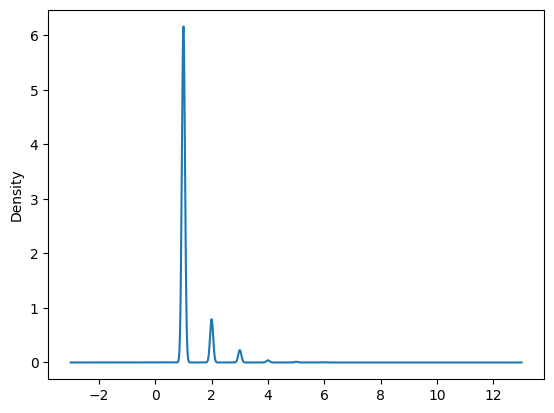

In [238]:
data['milestones'].plot(kind = 'kde')

<Axes: ylabel='Density'>

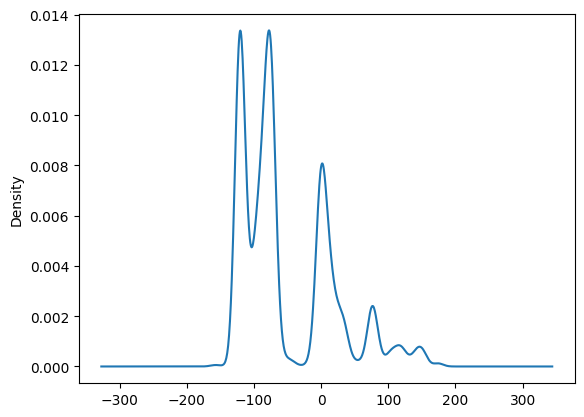

In [239]:
data['lng'].plot(kind = 'density')

<Axes: ylabel='Density'>

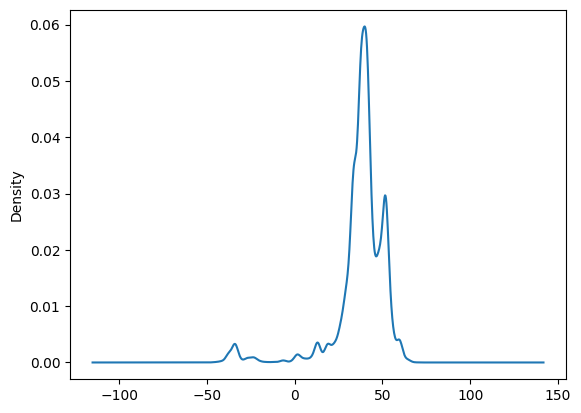

In [240]:
data['lat'].plot(kind = 'density')

<Axes: ylabel='Density'>

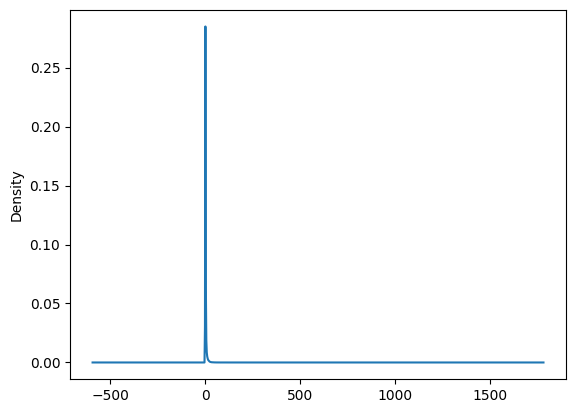

In [241]:
data['relationships'].plot(kind = 'density')

In [242]:
for i in num_columns:
     print(i,data[i].skew())
     if data[i].skew() <-.5 :
        print('negative',i)
        data[i].fillna(data[i].median(),inplace=True)
     elif data[i].skew() >.5:
        print('positive',i)
        data[i].fillna(data[i].median(),inplace=True)

    #  elif .5> data[i].skew() >-.5:
    #     print('symmitric',i)
    #     data[i].fillna(data[i].mean()[0],inplace=True)


entity_id -0.24266331757554718
funding_total_usd 38.02511561397544
positive funding_total_usd
milestones 3.4406745389368605
positive milestones
relationships 62.859575743852226
positive relationships
lat -2.7795294874849312
negative lat
lng 1.0292760493016295
positive lng


### Removing duplicates

In [243]:
data.duplicated().sum()

0

In [244]:
data.drop_duplicates(inplace=True)

In [245]:
data.duplicated().sum()

0

# Visuallinze data:

### univerate analysis

<Axes: >

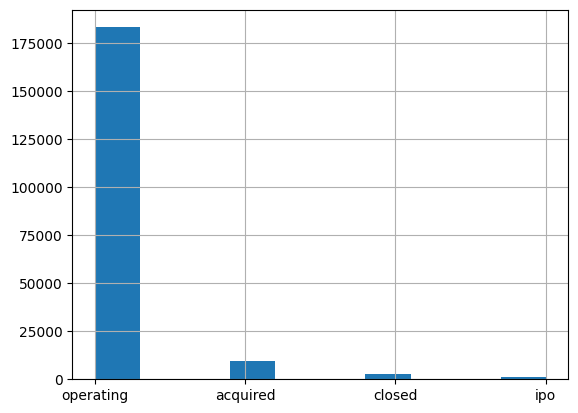

In [246]:
data['status'].hist()

In [247]:
data['status'].value_counts()

operating    183441
acquired       9394
closed         2584
ipo            1134
Name: status, dtype: int64

In [248]:
data.groupby('created_by')['status'].value_counts()

created_by  status   
-mmo-       operating    1
0000ak00    operating    1
011now      operating    1
028905      operating    3
03hedvig    operating    2
                        ..
zyryanov    operating    1
zzaidi      operating    2
zzarbi      operating    1
zzmcada     operating    1
zzoommedia  operating    1
Name: status, Length: 56216, dtype: int64

### Biverate analysis

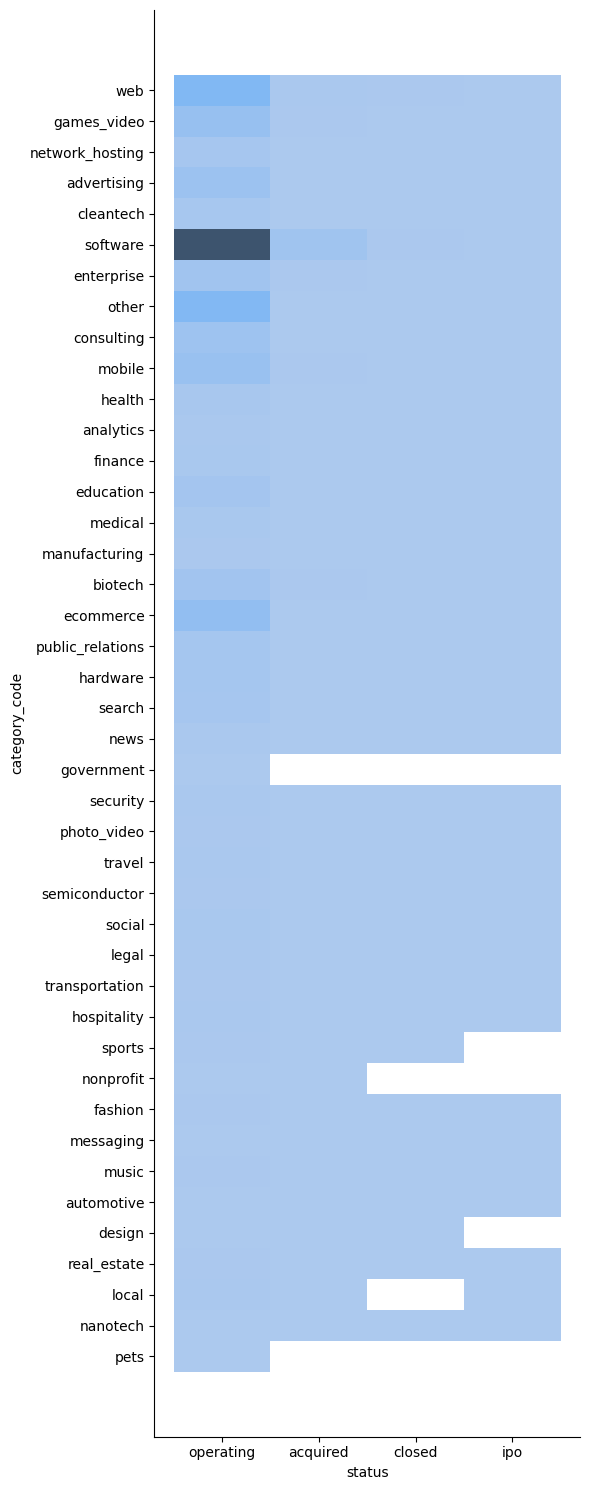

In [249]:
import seaborn
sns.displot(data,x='status', y='category_code', height=15,aspect=.4);

**from plot : the most category still open in software**

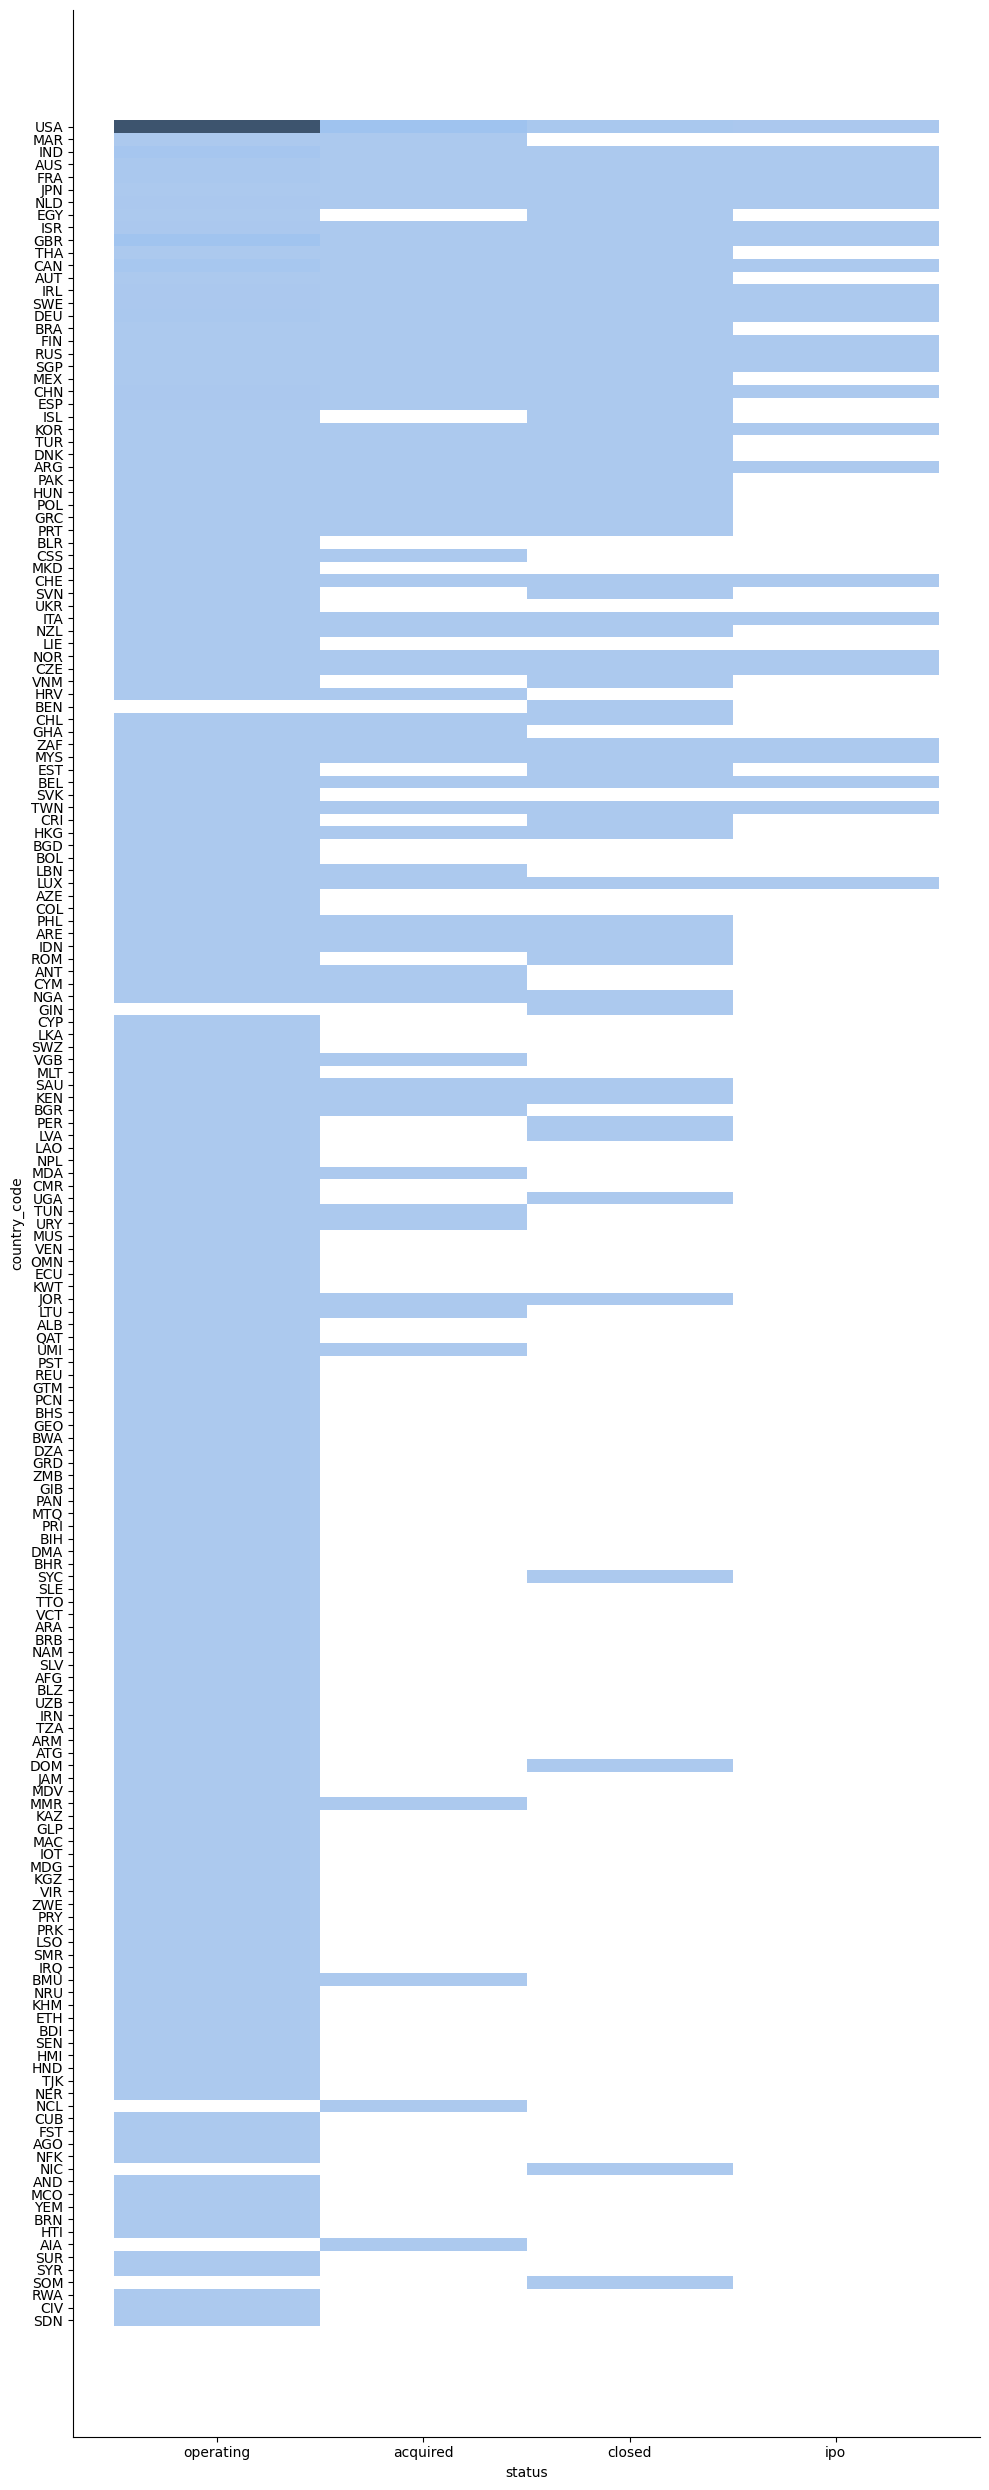

In [250]:
sns.displot(data,x='status', y='country_code', height=25,aspect=.4);

**from plot : the most country still open campanies is USA**

<Axes: xlabel='status', ylabel='relationships'>

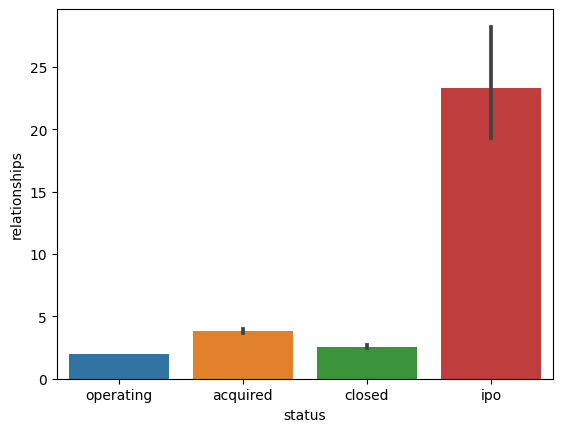

In [251]:
sns.barplot(y='relationships', x='status',data=data)

<Axes: xlabel='funding_total_usd', ylabel='category_code'>

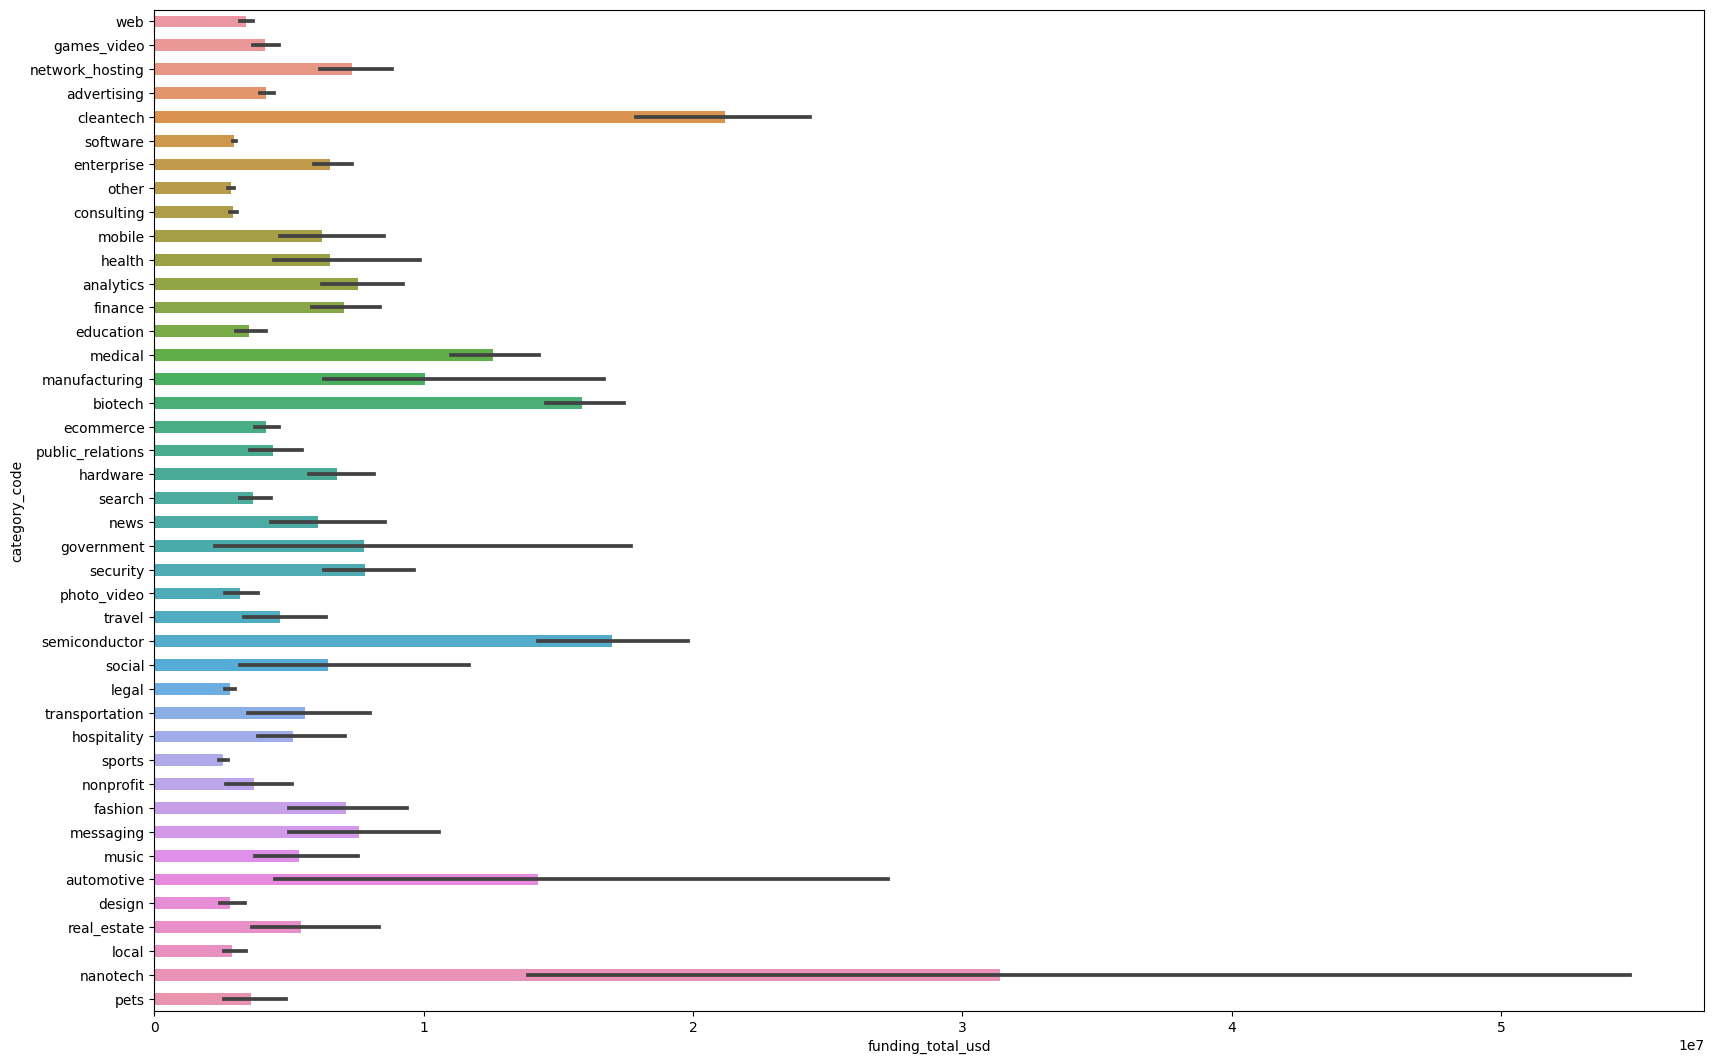

In [252]:
plt.figure(figsize=(20,13))
sns.barplot(x='funding_total_usd', y='category_code',data=data,width=.5)

**from plot : the most category take funding in nontech**

<Axes: xlabel='funding_total_usd', ylabel='status'>

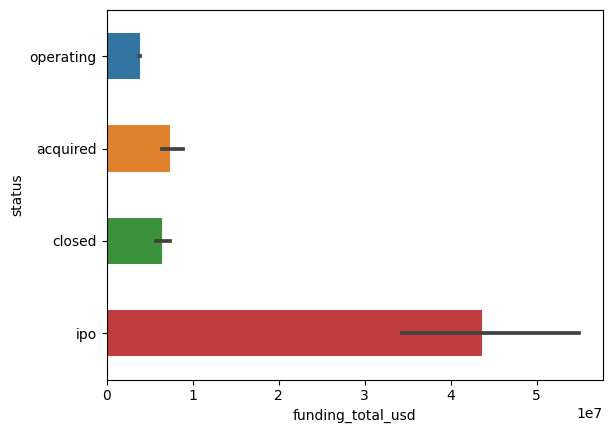

In [253]:
sns.barplot(x='funding_total_usd', y='status',data=data,width=.5)

### Data Labelling

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 196552
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   entity_id           196553 non-null  int64  
 1   category_code       196553 non-null  object 
 2   status              196553 non-null  object 
 3   founded_at          196553 non-null  object 
 4   description         196553 non-null  object 
 5   overview            196553 non-null  object 
 6   country_code        196553 non-null  object 
 7   state_code          196553 non-null  object 
 8   city                196553 non-null  object 
 9   region              196553 non-null  object 
 10  funding_total_usd   196553 non-null  float64
 11  first_milestone_at  196553 non-null  object 
 12  last_milestone_at   196553 non-null  object 
 13  milestones          196553 non-null  float64
 14  relationships       196553 non-null  float64
 15  created_by          196553 non-nul

In [255]:
for i in data.columns:
  if data[i].dtype =='object' :
    print(i,len(data[i].unique()),'\n')

category_code 42 

status 4 

founded_at 6156 

description 83696 

overview 126515 

country_code 175 

state_code 51 

city 10652 

region 5847 

first_milestone_at 4080 

last_milestone_at 3966 

created_by 55329 

created_at 182851 

updated_at 183558 



In [256]:
for i in data.columns:
  if data[i].dtype =='object' :
    print(i,(data[i].unique()),'\n')

category_code ['web' 'games_video' 'network_hosting' 'advertising' 'cleantech'
 'software' 'enterprise' 'other' 'consulting' 'mobile' 'health'
 'analytics' 'finance' 'education' 'medical' 'manufacturing' 'biotech'
 'ecommerce' 'public_relations' 'hardware' 'search' 'news' 'government'
 'security' 'photo_video' 'travel' 'semiconductor' 'social' 'legal'
 'transportation' 'hospitality' 'sports' 'nonprofit' 'fashion' 'messaging'
 'music' 'automotive' 'design' 'real_estate' 'local' 'nanotech' 'pets'] 

status ['operating' 'acquired' 'closed' 'ipo'] 

founded_at ['2005-10-17' '2011-01-01' '2008-07-26' ... '2008-04-27' '1996-01-31'
 '2002-02-23'] 

description ['Technology Platform Company' 'Garage Door Repair/Replacement'
 'Online Media' ... 'eCommerce automation & integration'
 'Foodservice industry social-busi network' 'Online fashon community'] 

overview ['Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to buil

In [257]:
data.drop(inplace =True,columns=['description','overview','state_code','region','city','entity_id','created_by'],axis=1)

In [258]:
# date_list=['created_at','first_milestone_at','last_milestone_at','updated_at','founded_at']

In [259]:
# data.to_csv('/content/drive/MyDrive/data_with_dates1.csv')

In [260]:
# data.drop(inplace =True,columns=date_list,axis=1)

In [261]:
data.head()

,category_code,status,founded_at,country_code,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_at,updated_at,lat,lng
0,web,operating,2005-10-17,USA,39750000.0,2010-09-05,2013-09-18,5.0,17.0,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071
1,games_video,acquired,2011-01-01,USA,2564500.0,2012-01-01,2012-01-01,1.0,6.0,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467
2,games_video,acquired,2011-01-01,USA,2564500.0,2003-02-01,2011-09-23,4.0,12.0,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,USA,2564500.0,2012-01-01,2012-01-01,1.0,1.0,2008-08-24 16:51:57,2008-09-06 14:19:18,39.768403,-77.036871
4,games_video,operating,2008-07-26,USA,2564500.0,2012-01-01,2012-01-01,1.0,1.0,2008-08-24 17:10:34,2008-09-06 14:19:18,39.768403,-77.036871


In [263]:
data.to_csv('/content/drive/MyDrive/data_without_preproed_dates.csv')